Set up for Mission 19 Swan Model

In [21]:
import cftime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy import interpolate
from scipy import io
from scipy import ndimage
import xarray as xr
import cmocean 

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Load mission 19 to get the metadata of the mission
mission_nc_path = './mission_data/mission_19.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission19_time = np.median(mission_dataset['time'][:])
mission19_time_datetime = cftime.num2pydate(mission19_time, 
                                     units=mission_dataset['time'].units, 
                                     calendar=mission_dataset['time'].calendar)
mission_dataset

/opt/homebrew/Caskroom/mambaforge/base/envs/dunex-venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: DUNEX microSWIFT drifter - Mission 19
    summary: University of Washington - Applied Physics Lab team collected these data using microSWIFT wave buoys at the USACE Field Research Facility as part of the USCRP funded project DUNEX (During Nearshore Events Experiment). The file contains both directly measured and computed quantities from the drifting wave buoys. The collection and processing of these data is explained in the github repository at https://github.com/SASlabgroup/DUNEXMainExp along with examples of how these data can be used.
    institution: University of Washington - Applied Physics Lab
    source: Observations from microSWIFT drifters deployed in the DUring Nearshore Events eXperiment (DUNEX)
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    creator_country: USA
    creator_email: erainvil@uw.edu
    creator_name: EJ Rainville, Jim T

In [23]:
mission_df_8m = pd.read_csv('./mission_data/mission_df.csv')
mission_df_8m

,Unnamed: 0,time,mission number,Hs [m],Tm [s],Mean Dir [deg],cross shore gamma location [m],break depth,freq [hz],energy density [m^2\hz],direction bins [deg],directional energy density [m^2/hz/deg],wind speed [m/s],wind direction [deg],water level [m]
0,0,2021-10-29 14:33:54.998780,78,2.133724,6.918120,80.728183,532.012197,6.096354,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.05025098354559162, 0.07217063888585135, 0.3...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[8.774435264058411e-05, 9.57169831963256e-05,...",9.615158,156.119450,0.499
1,1,2021-10-13 13:19:59.997600,29,1.092724,6.420097,58.598522,263.599684,3.122068,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.013723535890658674, 0.015484145426793838, 0...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[3.3258882467634976e-05, 3.438745261519216e-0...",7.155667,354.598450,-0.046
2,2,2021-10-07 14:34:59.998800,9,1.204854,5.407665,63.007655,283.712595,3.442439,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.011685272329470702, 0.01250600889351457, 0....","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[2.324277193110902e-05, 2.483886419213377e-05...",8.829667,37.633804,0.627
3,3,2021-10-15 16:19:29.998200,39,0.588102,7.199700,80.680591,199.966839,1.680292,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.006249074262052682, 0.006294627318541242, 0...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[1.1981144780293107e-05, 1.1754053048207425e-...",2.933667,14.616138,-0.055
4,4,2021-10-28 15:41:59.998080,68,1.482833,7.567346,58.694913,378.892729,4.236665,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.04060271438553851, 0.041858505216364424, 0....","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[0.00010348302021156996, 0.000102618650998920...",7.126901,36.389330,0.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,2021-10-29 13:05:59.999280,75,2.160752,6.956811,80.367305,538.717394,6.173577,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.05383202134492086, 0.08968265662088824, 0.6...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[7.690951315453276e-05, 8.58226339914836e-05,...",11.947333,135.171110,0.348
63,63,2021-10-11 13:21:29.997960,24,2.162277,6.206282,56.501510,539.095785,6.177935,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.05071478808400436, 0.07569422978112746, 0.1...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[0.00011699234164552763, 0.000126075814478099...",13.889231,11.561683,0.825
64,64,2021-10-05 18:18:29.998680,4,0.522822,8.807460,84.789797,183.005448,1.493776,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.008461591649143705, 0.009608970959136827, 0...","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[1.2740909369313158e-05, 1.4296941117208917e-...",3.584333,131.287700,-0.479
65,65,2021-10-14 13:07:29.998200,34,0.828214,7.232409,73.107152,232.633715,2.366327,"[0.03999999910593033, 0.04749999940395355, 0.0...","[0.01278272131939542, 0.010030188729890517, 0....","[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0,...","[[2.4330131054739468e-05, 2.5680119506432675e-...",3.899167,334.037480,-0.257


50.0
950.0
-100.0
1100.0


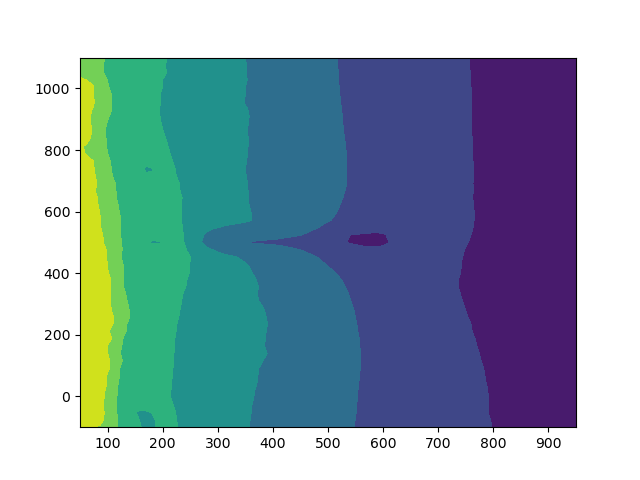

In [24]:
# Load basic processed bathymetry
bathy_basic_data = nc.Dataset('./bathy_data/FRF_geomorphology_DEMs_surveyDEM_20211021.nc')
xFRF = bathy_basic_data['xFRF'][:]
yFRF = bathy_basic_data['yFRF'][:]
bathy_x_grid, bathy_y_grid = np.meshgrid(xFRF, yFRF)
elevation_basic = bathy_basic_data['elevation'][0,:,:]
print(np.min(xFRF))
print(np.max(xFRF))
print(np.min(yFRF))
print(np.max(yFRF))

fig, ax = plt.subplots()
ax.contourf(bathy_x_grid, bathy_y_grid, elevation_basic)


## Computational Grid Setup
Later this can be functionalized to easily provide new grids of different sizes

In [25]:
# Define grid cell edge size
x_cgrid_size = 1 # units are meters
y_cgrid_size = 1 # units are meters

# Define grid edges
x_cgrid_min = 50
x_cgrid_max = 950
y_cgrid_min = 100
y_cgrid_max = 1000

# Define number of points based on grid size
num_x_points = int((x_cgrid_max - x_cgrid_min) / x_cgrid_size)
print(num_x_points)
num_y_points = int((y_cgrid_max - y_cgrid_min) / y_cgrid_size)
print(num_y_points)

# Create mesh grid
x_cgrid, y_cgrid = np.meshgrid(np.linspace(x_cgrid_min, x_cgrid_max, num_x_points),
                               np.linspace(y_cgrid_min, y_cgrid_max, num_y_points))

# Stack the x grid and y grid to be read into swan
swan_cgrid = np.concatenate((x_cgrid, y_cgrid), axis=0)
print(swan_cgrid.shape)

with open('./cgrid_m19m21.xy', 'w') as file:
    for x in x_cgrid.flatten():
        file.write(f"{x:18.12f}\n")
    for y in y_cgrid.flatten():
        file.write(f"{y:18.12f}\n")

# Save the grid to load in for analysis
io.savemat('.cgrid_m19m21.mat', {'x_cgrid':x_cgrid, 'y_cgrid':y_cgrid})

print(f'Values to put in SWAN input file {num_x_points-1} {num_y_points-1}')

900
900
(1800, 900)
Values to put in SWAN input file 899 899


## Bathymetry Data Setup

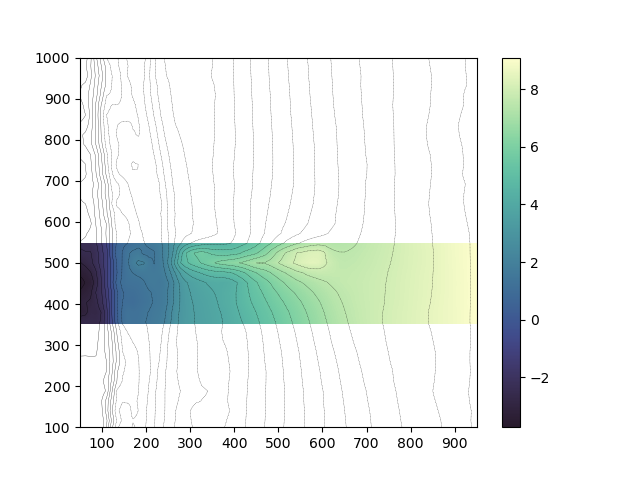

In [26]:
elevation_regridded = interpolate.interpn((xFRF, yFRF), elevation_basic.T, (x_cgrid, y_cgrid), method='linear', fill_value=0)
fig, ax = plt.subplots()
im = ax.pcolormesh(x_cgrid[250:450, :], y_cgrid[250:450, :], -elevation_regridded[250:449,:-1], shading='flat', cmap=cmocean.cm.deep_r)
ax.contour(x_cgrid, y_cgrid, elevation_regridded, colors='k', levels=25, linewidths=0.2)
fig.colorbar(im)


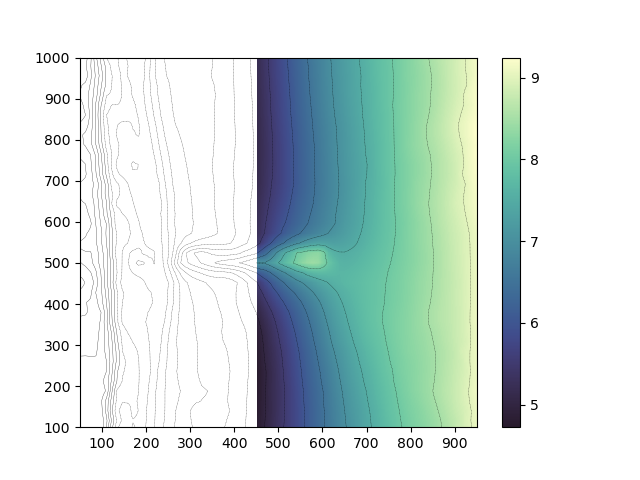

In [27]:
fig, ax = plt.subplots()
im = ax.pcolormesh(x_cgrid[:, 400:], y_cgrid[:, 400:], -elevation_regridded[:-1,400:-1], shading='flat', cmap=cmocean.cm.deep_r)
ax.contour(x_cgrid, y_cgrid, elevation_regridded, colors='k', levels=25, linewidths=0.2)
fig.colorbar(im)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(900, 900)


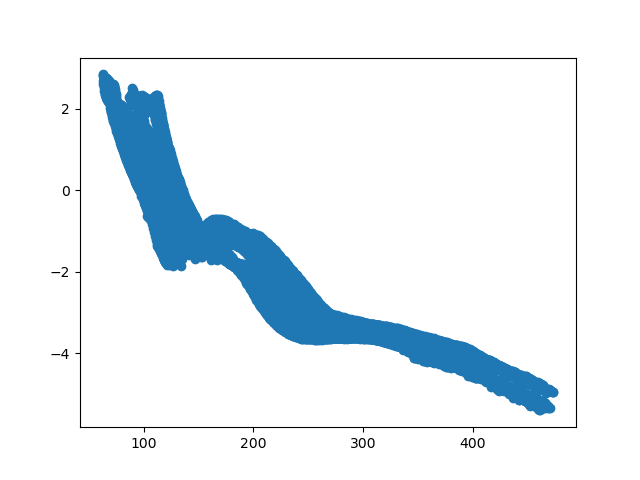

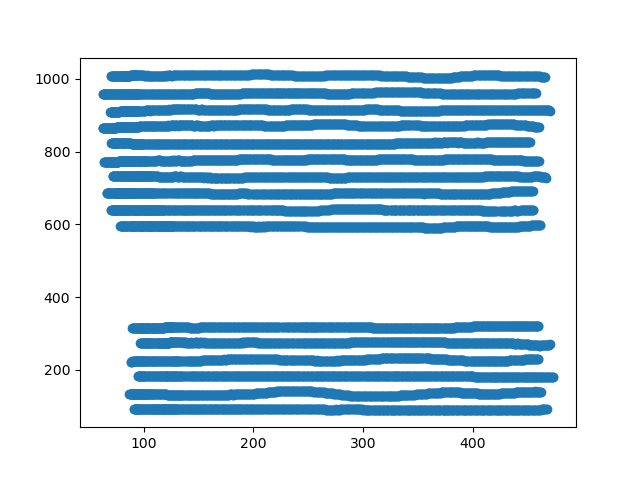

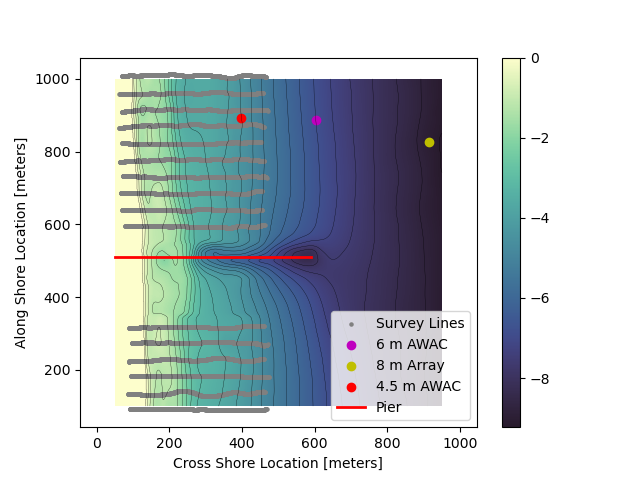

In [28]:
# Load the bathymetry data from closest to Mission 19
bathy_20211008 = nc.Dataset('./bathy_data/FRF_geomorphology_elevationTransects_survey_20211008.nc')

# Get the point cloud data from the transect file
xFRF_survey_points = bathy_20211008['xFRF'][:]
yFRF_survey_points = bathy_20211008['yFRF'][:]
elevation_survey_points = bathy_20211008['elevation'][:]

fig, ax = plt.subplots()
ax.scatter(xFRF_survey_points, elevation_survey_points)

fig, ax = plt.subplots()
ax.scatter(xFRF_survey_points, yFRF_survey_points)

# Interpolate the sruvey points onto the same grid as the computational grid
zgrid = interpolate.griddata((xFRF_survey_points, yFRF_survey_points), elevation_survey_points,
                             (x_cgrid, y_cgrid), method='linear', fill_value=0)

# Synthetically fill in the bathymetry from the regridded full survey
zgrid[250:450,:] = elevation_regridded[250:450,:]
zgrid[:,400:] = elevation_regridded[:,400:]

# Flip the bathy sign
swandepth = -zgrid
swandepth = np.nan_to_num(swandepth, copy=False)

# smooth bathy
swandepth = ndimage.gaussian_filter(swandepth, sigma=5)
swandepth[swandepth < 0.1 ] = 0.0

fig, ax = plt.subplots()
im = ax.pcolormesh(x_cgrid, y_cgrid, -swandepth[:-1,:-1], shading='flat', cmap=cmocean.cm.deep_r)
ax.contour(x_cgrid, y_cgrid, swandepth, colors='k', levels=25, linewidths=0.2)
ax.scatter(xFRF_survey_points, yFRF_survey_points, color='gray', s=5, label='Survey Lines')
fig.colorbar(im)
 # Figure properties
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations
                                    # published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
            color='r', label='4.5 m AWAC')
ax.set_aspect('equal')
ax.set_xlabel('Cross Shore Location [meters]')
ax.set_ylabel('Along Shore Location [meters]')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier')
ax.legend()
ax.axis('equal')

# Number of nan values 
print(np.isnan(swandepth))

# Set below depth min points to exception value
swandepth_small = swandepth.copy()
swandepth_small[swandepth_small < 0.1] = -999

# Save the bathy data as a text file 
depth_fname = './depth_m19m21.dep'
np.savetxt(depth_fname, swandepth_small, fmt="%011.8f", )

print(swandepth_small.shape)

Expand the bathymetry to go further north and south than the measured values

In [29]:
# Define grid cell edge size
x_cgrid_size = 1 # units are meters
y_cgrid_size = 1 # units are meters

# Define grid edges
x_cgrid_min = 50
x_cgrid_max = 950
y_cgrid_min = -1200
y_cgrid_max = 1800

# Define number of points based on grid size
num_x_points = int((x_cgrid_max - x_cgrid_min) / x_cgrid_size)
print(num_x_points)
num_y_points = int((y_cgrid_max - y_cgrid_min) / y_cgrid_size)
print(num_y_points)

# Create mesh grid
x_cgrid_expand, y_cgrid_expand = np.meshgrid(np.linspace(x_cgrid_min, x_cgrid_max, num_x_points),
                               np.linspace(y_cgrid_min, y_cgrid_max, num_y_points))

# Stack the x grid and y grid to be read into swan
swan_cgrid_expand = np.concatenate((x_cgrid_expand, y_cgrid_expand), axis=0)
print(swan_cgrid_expand.shape)

with open('./cgrid_m19_expand.xy', 'w') as file:
    for x in x_cgrid_expand.flatten():
        file.write(f"{x:18.12f}\n")
    for y in y_cgrid_expand.flatten():
        file.write(f"{y:18.12f}\n")

# Save the grid to load in for analysis
io.savemat('./cgrid_m19_expand.mat', {'x_cgrid':x_cgrid_expand, 'y_cgrid':y_cgrid_expand})

print(f'Values to put in SWAN input file {num_x_points-1} {num_y_points-1}')

900
3000
(6000, 900)
Values to put in SWAN input file 899 2999


In [30]:
y_cgrid_expand[2999, :]

array([1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800., 1800.,
       1800., 1800.,

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(3000, 900)


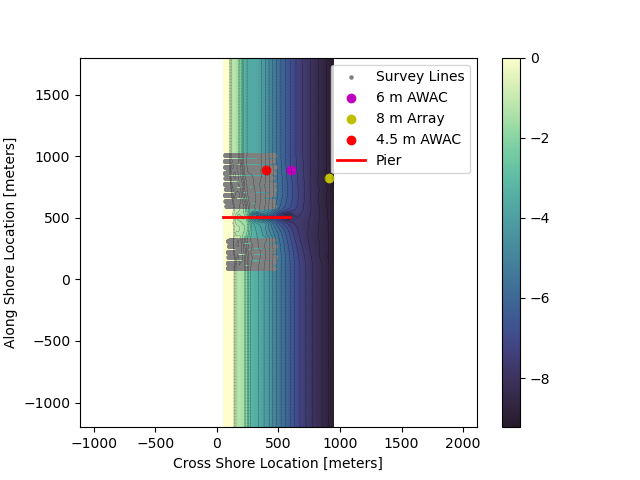

In [31]:
# Interpolate the sruvey points onto the same grid as the computational grid
swandepth_expanded = np.zeros(x_cgrid_expand.shape)
swandepth_expanded.shape

# Fill in expanded value with original points
swandepth_expanded[1300:2200, :900] = swandepth

# Expand the bathymetry South the the last profile 
for n in range(1300):
    swandepth_expanded[n, :] = swandepth[0,:]

# Expand the bathymetry South the the last profile 
for n in range(3000-2200):
    swandepth_expanded[2999-n, :] = swandepth[-1,:]

fig, ax = plt.subplots()
im = ax.pcolormesh(x_cgrid_expand, y_cgrid_expand, -swandepth_expanded[:-1,:-1], shading='flat', cmap=cmocean.cm.deep_r)
ax.contour(x_cgrid_expand, y_cgrid_expand, -swandepth_expanded, colors='k', levels=25, linewidths=0.2)
ax.scatter(xFRF_survey_points, yFRF_survey_points, color='gray', s=5, label='Survey Lines')
fig.colorbar(im)
 # Figure properties
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations
                                    # published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
            color='r', label='4.5 m AWAC')
ax.set_aspect('equal')
ax.set_xlabel('Cross Shore Location [meters]')
ax.set_ylabel('Along Shore Location [meters]')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier')
ax.legend()
ax.axis('equal')

# Number of nan values 
print(np.isnan(swandepth_expanded))

# Set below depth min points to exception value
swandepth_expanded[swandepth_expanded < 0.1] = -999

# Save the bathy data as a text file 
depth_fname = './depth_m19m21_expanded.dep'
np.savetxt(depth_fname, swandepth_expanded, fmt="%011.8f", )

print(swandepth_expanded.shape)

Now that we have expanded the bathymetry to be along shore uniform from each edge of the measured bathymetry lets ramp both edges to a mean profile to use peridoic boundary conditions.

/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_44364/3907224256.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(3000, 900)


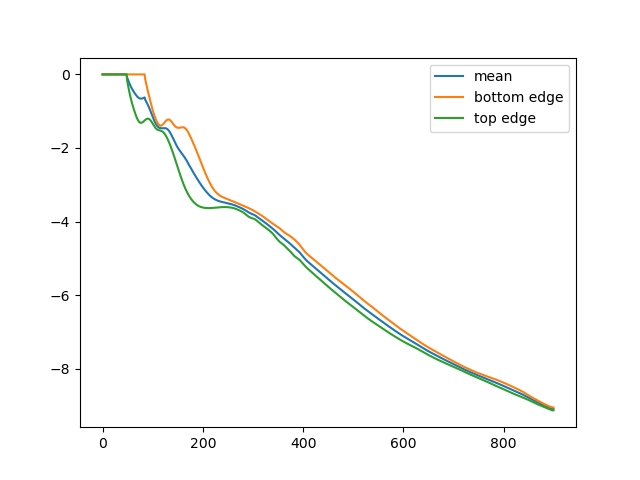

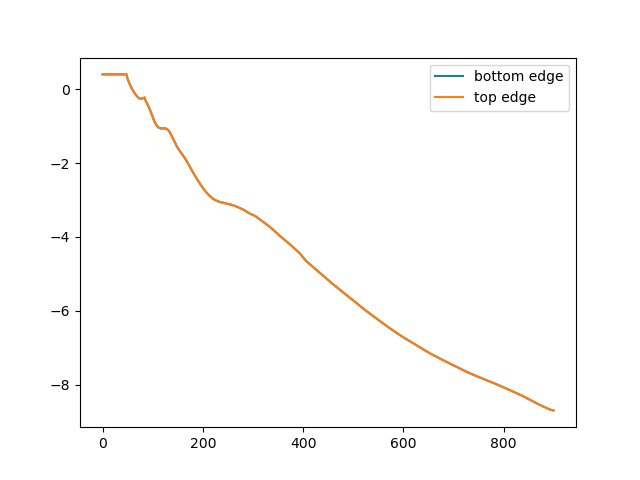

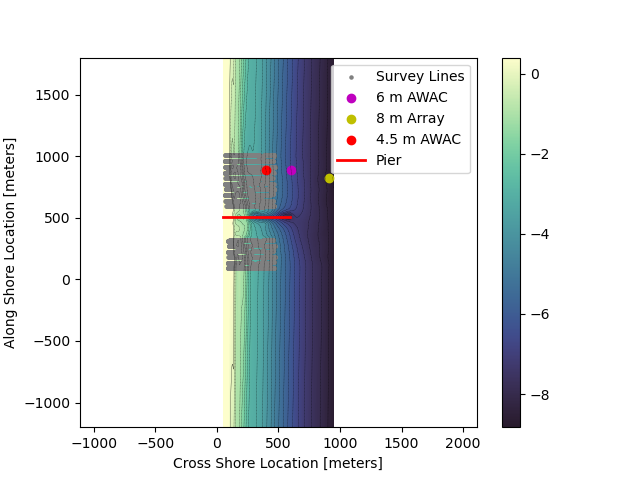

In [32]:
# Interpolate the sruvey points onto the same grid as the computational grid
swandepth_expanded = np.zeros(x_cgrid_expand.shape)
swandepth_expanded.shape

# Fill in expanded value with original points
swandepth_expanded[1300:2200, :900] = swandepth

# compute mean profile between the two outer edges
mean_swandepth = (swandepth[0,:] + swandepth[-1,:]) / 2

# plot the average profile 
fig, ax = plt.subplots()
ax.plot(-mean_swandepth, label='mean')
ax.plot(-swandepth[0,:], label='bottom edge')
ax.plot(-swandepth[-1,:], label='top edge')
ax.legend()

# Expand the bathymetry South of the last profile 
bottom_along_shore_locs = y_cgrid_expand[:1300,0]
for n in range(900):
    swandepth_expanded[:1300, n] = np.interp(bottom_along_shore_locs, [y_cgrid_expand[0,0], y_cgrid_expand[1300,0]], 
                                     [mean_swandepth[n], swandepth[0,n]])
    
# Expand the bathymetry South of the last profile 
top_along_shore_locs = y_cgrid_expand[2200:,0]
for n in range(900):
    swandepth_expanded[2200:, n] = np.interp(top_along_shore_locs, [y_cgrid_expand[2200,0], y_cgrid_expand[-1,0]], 
                                     [swandepth[-1,n], mean_swandepth[n]])


# Adjust the bathymetry to average water level during the mission 
water_level = mission_df_8m.loc[mission_df_8m['mission number'] == 19]['water level [m]'].values[0]
swandepth_expanded = swandepth_expanded + water_level

# Check that the new first and last profiles are the same 
fig, ax = plt.subplots()
ax.plot(-swandepth_expanded[0,:], label='bottom edge')
ax.plot(-swandepth_expanded[-1,:], label='top edge')
ax.legend()

fig, ax = plt.subplots()
im = ax.pcolormesh(x_cgrid_expand, y_cgrid_expand, -swandepth_expanded[:-1,:-1], shading='flat', cmap=cmocean.cm.deep_r)
ax.contour(x_cgrid_expand, y_cgrid_expand, -swandepth_expanded, colors='k', levels=25, linewidths=0.2)
ax.scatter(xFRF_survey_points, yFRF_survey_points, color='gray', s=5, label='Survey Lines')
fig.colorbar(im)
 # Figure properties
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations
                                     # published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations
ax.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
            color='r', label='4.5 m AWAC')
ax.set_aspect('equal')
ax.set_xlabel('Cross Shore Location [meters]')
ax.set_ylabel('Along Shore Location [meters]')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier')
ax.legend()
ax.axis('equal')

# Save the bathy as a mat file 
io.savemat('./swanbathy_m19_expanded.mat', {'bathy':swandepth_expanded})

# Number of nan values 
print(np.isnan(swandepth_expanded))

# Set below depth min points to exception value
swandepth_expanded[swandepth_expanded < 0.1] = -999

# Save the bathy data as a text file 
depth_fname = './depth_m19_expanded.dep'
np.savetxt(depth_fname, swandepth_expanded, fmt="%011.8f", )

print(swandepth_expanded.shape)

Ran MATLAB function create roms bathy file and used this command  create_roms_netcdf_grid_file('roms_grid.nc', 900, 3000)

Now I need to investigate that file a bit more and make sure I know what is in there and to set the bathymetry data to reflect that is in the swan bathy data.

In [33]:
# Import the roms bathy file and inspect it
roms_bathy = nc.Dataset('./romsgrid_m19.nc', 'r+')
roms_bathy

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    type: ROMS GRID file
    gridid: theGridTitle
    history: Created by create_roms_netcdf_grid_file, on 17-Oct-2023 08:43:43
    title: ROMS Application
    dimensions(sizes): xi_psi(899), xi_rho(900), xi_u(899), xi_v(900), eta_psi(2999), eta_rho(3000), eta_u(3000), eta_v(2999), one(1), two(2), bath(1)
    variables(dimensions): float64 xl(one), float64 el(one), |S1 JPRJ(two), |S1 spherical(one), int16 depthmin(one), int16 depthmax(one), float64 hraw(bath, eta_rho, xi_rho), float64 h(eta_rho, xi_rho), float64 f(eta_rho, xi_rho), float64 pm(eta_rho, xi_rho), float64 pn(eta_rho, xi_rho), float64 dndx(eta_rho, xi_rho), float64 dmde(eta_rho, xi_rho), float64 x_rho(eta_rho, xi_rho), float64 y_rho(eta_rho, xi_rho), float64 x_psi(eta_psi, xi_psi), float64 y_psi(eta_psi, xi_psi), float64 x_u(eta_u, xi_u), float64 y_u(eta_u, xi_u), float64 x_v(eta_v, xi_v), float64 y_v(eta_v, xi_v), float64 lat_r

In [34]:
bathy_vals = roms_bathy['h'][:]
print(bathy_vals.shape)
print(bathy_vals[0])

(3000, 900)
[ 9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e+02  9.99000000e+02  9.99000000e+02  9.99000000e+02
  9.99000000e

right now the bathymetry file is empty - I think I need to populate it with the bathymetry values used in the swan grid above.

In [35]:
# Set the h values to the bathymetry values 
roms_bathy['h'][:] = -swandepth_expanded
print(roms_bathy['h'][:])

[[999.         999.         999.         ...  -8.69130856  -8.69327959
   -8.69428497]
 [999.         999.         999.         ...  -8.691278    -8.69324897
   -8.69425432]
 [999.         999.         999.         ...  -8.69124744  -8.69321835
   -8.69422367]
 ...
 [999.         999.         999.         ...  -8.69140801  -8.69337923
   -8.69438471]
 [999.         999.         999.         ...  -8.69135829  -8.69332941
   -8.69433484]
 [999.         999.         999.         ...  -8.69130856  -8.69327959
   -8.69428497]]


In [36]:
# Set mask inds
mask_inds = np.where(-swandepth_expanded == 999)
# roms_bathy['mask_rho'][mask_inds]


In [37]:
roms_bathy.close

<function Dataset.close>

In [38]:
# Read the rip current grid file
rip_current_grid = nc.Dataset('./ocean_rip_current_grd.nc', 'r')
rip_current_grid

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    type: ROMS GRID file
    gridid: theGridTitle
    history: Created by "mat2roms_jcw" on 01-Apr-2011 20:45:28
    title: ROMS Application
    dimensions(sizes): xi_psi(151), xi_rho(152), xi_u(151), xi_v(152), eta_psi(262), eta_rho(263), eta_u(263), eta_v(262), one(1), two(2), bath(0)
    variables(dimensions): float64 xl(one), float64 el(one), |S1 JPRJ(two), int16 depthmin(one), int16 depthmax(one), |S1 spherical(one), float64 hraw(bath, eta_rho, xi_rho), float64 h(eta_rho, xi_rho), float64 f(eta_rho, xi_rho), float64 pm(eta_rho, xi_rho), float64 pn(eta_rho, xi_rho), float64 dndx(eta_rho, xi_rho), float64 dmde(eta_rho, xi_rho), float64 x_rho(eta_rho, xi_rho), float64 y_rho(eta_rho, xi_rho), float64 x_psi(eta_psi, xi_psi), float64 y_psi(eta_psi, xi_psi), float64 x_u(eta_u, xi_u), float64 y_u(eta_u, xi_u), float64 x_v(eta_v, xi_v), float64 y_v(eta_v, xi_v), float64 lat_rho(eta_rho, xi_rho)

Lets load the Rip Current test case bathymetry and exam it so that we can model the dunex bathymetry exactly after it!